Idea: show examplary comparison of some TOP-TF output with some condition related GO-term gene sets

In [1]:
import seaborn as sns
import collections as col
import pandas as pd
import statistics
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from pathlib import Path
import gseapy as gp
import functions_sheet as myfunc
from gseapy import barplot, dotplot
import re
import upsetplot as usp
from collections import Counter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from gseapy import Msigdb
from gseapy import GSEA
from venn import venn

path_to_all_tfs_file = "/nfs/data3/IHEC/TF_PRIO/additional_files/all_tfs.txt"
path_to_figure_folder = "/nfs/data3/IHEC/TF_PRIO/created_plots/2_overlap_analysis"
path_to_example_files = "/nfs/data3/IHEC/TF_PRIO/additional_files/files_for_TF_overlap_example"

all_tfs file aquired using
head -n 1 _TEPIC_01_23_24_18_17_00_769098548_Affinity.txt > all_tfs.txt
from the /TEPIC_TEPIC/output folder

# Plotting venn diagram

selection of gene sets for diagram

In [2]:
all_tfs = pd.read_csv(os.path.join(path_to_example_files,"all_tfs.txt"), sep="\t")
all_tfs_set = set(all_tfs.columns.values)
go_tf = set(myfunc.read_in_gene_ontology_file(os.path.join(path_to_example_files,"GO_transcription-factors.txt"))["Symbol"])
tf_active = set(pd.read_csv(os.path.join(path_to_example_files,"top_tfs_dcg_euchromatin.tsv"), sep="\t")["TF"])
tf_repressive = set(myfunc.pd.read_csv(os.path.join(path_to_example_files,"top_tf_dcg_heterochromatin.tsv"), sep="\t")["TF"])
go_genes_t_cell = set(myfunc.read_in_gene_ontology_file(os.path.join(path_to_example_files,"GO_t-cell-activation.txt"))["Symbol"])
go_genes_neutrophil = set(myfunc.read_in_gene_ontology_file(os.path.join(path_to_example_files,"GO_neutrophil-activation.txt"))["Symbol"])

In [3]:
data_dict_active = {"TF_active_marks":tf_active,
            "GO_genes_t_cell_activation": go_genes_t_cell,
            "GO_genes_neutrophil_activation": go_genes_neutrophil,
            "GO_TFs": go_tf}

Plotting

In [16]:
data_dict_active.keys()

dict_keys(['TF_active_marks', 'GO_genes_t_cell_activation', 'GO_genes_neutrophil_activation', 'GO_TFs'])

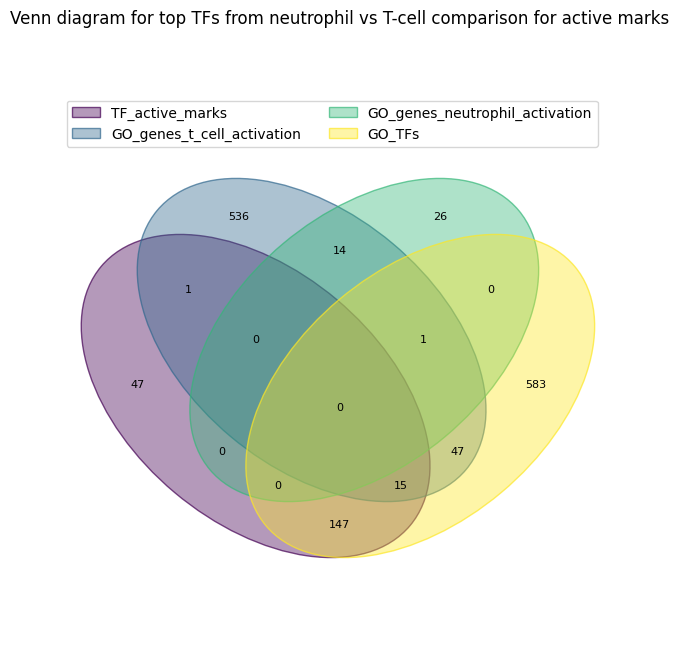

In [37]:
venn(data_dict_active,fontsize=8)
plt.legend(data_dict_active.keys(), loc="best", ncol=2, bbox_to_anchor=(0.43, 0.4, 0.5, 0.5))
plt.title("Venn diagram for top TFs from neutrophil vs T-cell comparison for active marks")
figure_file_name = "Venn_diagram_neutro_t_T_cell_active"

plt.savefig(os.path.join(path_to_figure_folder, figure_file_name), bbox_inches='tight')

## inspection what TFs are not in GO_TF gene set

In [6]:
tf_active_exclusive = tf_active - go_tf

In [ ]:
tf_active_exclusive

{'ARGFX',
 'ARNT::HIF1A',
 'BATF::JUN',
 'CBFB',
 'DMRT3',
 'DMRTA1',
 'DPRX',
 'E2F5',
 'ERF::FOXO1',
 'ETV5::FOXO1',
 'ETV7',
 'FOS::JUN',
 'FOSL1::JUN',
 'FOSL1::JUNB',
 'FOXB1',
 'FOXJ2::ELF1',
 'GFI1B',
 'HIC2',
 'JUN::JUNB',
 'MSANTD3',
 'NEUROG2',
 'NOTO',
 'OSR1',
 'POU5F1B',
 'POU6F2',
 'PRDM6',
 'SOX3',
 'SP4',
 'TEAD3',
 'TRIM28',
 'VENTX',
 'ZBTB12',
 'ZBTB26',
 'ZBTB48',
 'ZBTB7C',
 'ZNF121',
 'ZNF148',
 'ZNF18',
 'ZNF189',
 'ZNF257',
 'ZNF263',
 'ZNF317',
 'ZNF341',
 'ZNF354C',
 'ZNF384',
 'ZNF554',
 'ZNF692',
 'ZNF770'}

In [19]:
for tf in tf_active.intersection(go_tf_new):
    print(tf)

LHX2
ESX1
NFATC4
ONECUT1
PLAGL2
FOXC1
PKNOX1
NOTO
LHX6
IRF2
FOXB1
ISX
ELF5
MEF2C
HOXD9
BARX2
GATA2
MAX
HOXA7
FOXO3
ZBTB26
HOXA5
GSX2
MNT
NR2E3
ELK4
PITX3
HOXB7
SOX3
NFATC3
NR4A2
MAFK
TCF12
DRGX
NFIC
POU3F1
SNAI3
BARHL1
RREB1
OSR1
ETV6
HOXC10
TCF4
NR2C2
PHOX2A
TFAP2B
TEAD3
NFIL3
NHLH1
SRY
HOXD4
RORA
MGA
RELA
NFATC2
RBPJ
TBX15
LBX1
FEZF1
MYOD1
ATF2
KLF6
ZBTB48
MEIS2
PITX1
POU6F2
SOX9
VSX2
OTX1
GFI1B
NEUROD1
RAX
NFIX
NFYC
KLF7
ZBTB17
HOXD3
HOXD8
KLF4
MAZ
MEIS3
MEF2A
ISL2
NR2F2
TBX1
STAT5B
SREBF1
SP3
PRRX1
HOXA4
MYC
TEAD2
FOXK1
SP1
POU5F1
EMX1
RORC
PRRX2
BHLHE22
BATF3
DLX6
ZBTB7C
MYOG
E2F6
GATA5
FOXO6
HNF4G
SNAI2
KLF11
BHLHA15
DMRTA1
ZEB1
PTF1A
FOXK2
ESRRA
INSM1
HIC2
STAT3
GATA1
GBX1
TLX2
TCF7L2
DMRT3
PAX4
BARHL2
OSR2
VAX2
CDX4
CDX1
ESRRG
VAX1
FOXC2
MXI1
GRHL2
TBX18
FOXQ1
FOSL2
YY1
ASCL1
JUN
NOBOX
ESR2
BSX
ELF3
ISL1
KLF8
FOXJ2
REL
SOX18
ZBTB12
MYB
EN1
POU6F1
NR5A2
TWIST1
GABPA
LHX5
MNX1
FOSB
POU3F4
NR4A1
NEUROG2
SP4
E2F5
OTX2
FOXI1
PATZ1
CREB1
STAT1
HOXA2
SOX8
HOXB8
SOX13
IKZF1
LMX1A
JUNB


## inspection what TFs   are in ovlerap with GO_TF gene set

In [26]:
tf_active.intersection(go_tf)

{'ASCL1',
 'ATF2',
 'BARHL1',
 'BARHL2',
 'BARX2',
 'BATF3',
 'BHLHA15',
 'BHLHE22',
 'BSX',
 'CDX1',
 'CDX4',
 'CREB1',
 'DLX6',
 'DRGX',
 'E2F6',
 'ELF3',
 'ELF5',
 'ELK4',
 'EMX1',
 'EN1',
 'ESR2',
 'ESRRA',
 'ESRRG',
 'ESX1',
 'ETV6',
 'EVX2',
 'FEZF1',
 'FOSB',
 'FOSL2',
 'FOXC1',
 'FOXC2',
 'FOXI1',
 'FOXJ2',
 'FOXK1',
 'FOXK2',
 'FOXO3',
 'FOXO6',
 'FOXQ1',
 'GABPA',
 'GATA1',
 'GATA2',
 'GATA5',
 'GBX1',
 'GRHL2',
 'GSX2',
 'HNF4G',
 'HOXA2',
 'HOXA4',
 'HOXA5',
 'HOXA7',
 'HOXB3',
 'HOXB7',
 'HOXB8',
 'HOXC10',
 'HOXD3',
 'HOXD4',
 'HOXD8',
 'HOXD9',
 'IKZF1',
 'INSM1',
 'IRF2',
 'ISL1',
 'ISL2',
 'ISX',
 'JUN',
 'JUNB',
 'KLF11',
 'KLF4',
 'KLF6',
 'KLF7',
 'KLF8',
 'LBX1',
 'LHX2',
 'LHX5',
 'LHX6',
 'LMX1A',
 'MAFK',
 'MAX',
 'MAZ',
 'MEF2A',
 'MEF2C',
 'MEIS2',
 'MEIS3',
 'MGA',
 'MNT',
 'MNX1',
 'MSX2',
 'MXI1',
 'MYB',
 'MYC',
 'MYOD1',
 'MYOG',
 'NEUROD1',
 'NFATC2',
 'NFATC3',
 'NFATC4',
 'NFIC',
 'NFIL3',
 'NFIX',
 'NFYC',
 'NHLH1',
 'NOBOX',
 'NR2C2',
 'NR2E3',
 'NR2